# Introduction

I've always been somewhat curious how stable the ratio of between spike-ins and sample is

In [4]:
import pandas
import os
import sys
import re
from matplotlib import pyplot
import seaborn

from bulk_peng_utils import (
    load_gene_table
)

In [5]:
%matplotlib inline

The file is also available at https://woldlab.caltech.edu/~phe/temp2/RSEMTMPtime.gene

In [6]:
tpms = load_gene_table('bulk_peng/RSEMTPMtime.gene')

In [13]:
tpms.index[:-96]

Index(['10000', '10001', '10002', '10003', '10004', '10005', '10006', '10007',
       '10008', '10009',
       ...
       'ENSMUSG00000104518.1', 'ENSMUSG00000104519.1', 'ENSMUSG00000104520.1',
       'ENSMUSG00000104521.1', 'ENSMUSG00000104522.1', 'ENSMUSG00000104523.1',
       'ENSMUSG00000104524.1', 'ENSMUSG00000104525.1', 'ENSMUSG00000104526.1',
       'ENSMUSG00000104527.1'],
      dtype='object', length=69594)

In [9]:
tpms.index[-96:]

Index(['gSpikein_ERCC-00002', 'gSpikein_ERCC-00003', 'gSpikein_ERCC-00004',
       'gSpikein_ERCC-00007', 'gSpikein_ERCC-00009', 'gSpikein_ERCC-00012',
       'gSpikein_ERCC-00013', 'gSpikein_ERCC-00014', 'gSpikein_ERCC-00016',
       'gSpikein_ERCC-00017', 'gSpikein_ERCC-00018', 'gSpikein_ERCC-00019',
       'gSpikein_ERCC-00022', 'gSpikein_ERCC-00023', 'gSpikein_ERCC-00024',
       'gSpikein_ERCC-00025', 'gSpikein_ERCC-00028', 'gSpikein_ERCC-00031',
       'gSpikein_ERCC-00033', 'gSpikein_ERCC-00034', 'gSpikein_ERCC-00035',
       'gSpikein_ERCC-00039', 'gSpikein_ERCC-00040', 'gSpikein_ERCC-00041',
       'gSpikein_ERCC-00042', 'gSpikein_ERCC-00043', 'gSpikein_ERCC-00044',
       'gSpikein_ERCC-00046', 'gSpikein_ERCC-00048', 'gSpikein_ERCC-00051',
       'gSpikein_ERCC-00053', 'gSpikein_ERCC-00054', 'gSpikein_ERCC-00057',
       'gSpikein_ERCC-00058', 'gSpikein_ERCC-00059', 'gSpikein_ERCC-00060',
       'gSpikein_ERCC-00061', 'gSpikein_ERCC-00062', 'gSpikein_ERCC-00067',
       'gSpi

In [17]:
tpms.columns

Index(['gene_name', 'adrenal_p0_1', 'adrenal_p0_2', 'bladder_p0_1',
       'bladder_p0_2', 'face_e10.5_1', 'face_e10.5_2', 'face_e11.5_1',
       'face_e11.5_2', 'face_e12.5_1',
       ...
       'stomach_e14.5_1', 'stomach_e14.5_2', 'stomach_e15.5_1',
       'stomach_e15.5_2', 'stomach_e16.5_1', 'stomach_e16.5_2', 'stomach_p0_1',
       'stomach_p0_2', 'thymus_p0_1', 'thymus_p0_2'],
      dtype='object', length=157)

In [23]:
sample = tpms.loc['10000':'ENSMUSG00000104527.1', 'adrenal_p0_1':'thymus_p0_2'].sum(axis='rows')

In [24]:
spikes = tpms.loc['gSpikein_ERCC-00002':'gSpikein_ERCC-00171', 'adrenal_p0_1':'thymus_p0_2'].sum(axis='rows')

In [26]:
fraction_spike = spikes / (sample+spikes)

$\frac{\displaystyle\sum_{i=spike-ins}{TPM_{experiment}}}
  {\displaystyle\sum_{i=spike-ins}{TPM_{experiment}}+
  {\displaystyle\sum_{i=genes}{TPM_{experiment}}}
}$

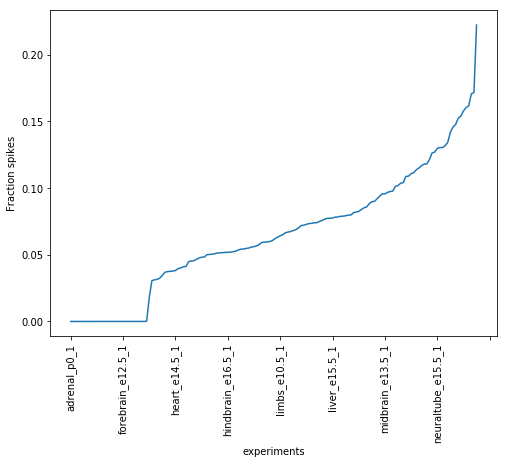

In [58]:
f = pyplot.figure(figsize=(8,6))
ax = f.add_subplot(1,1,1)
fraction_spike.sort_values().plot.line(ax=ax, use_index=True)
_ = ax.set_ylabel('Fraction spikes')
_ = ax.set_xlabel('experiments')

ticks = [ int(x) for x in ax.get_xticks() ]
labels = [ fraction_spike.index[x] if x >=0 and x < len(fraction_spike.index) else '' for x in ticks]
_ = ax.set_xticklabels(labels, rotation=90)

In [56]:
ticks

[-20.0, 0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 180.0]

In [43]:
pandas.DataFrame.plot?

In [54]:
fraction_spike.index[]

'neuraltube_e13.5_1'